### Labels

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- Destination - The planet the passenger will be debarking to.

- Age - The age of the passenger.

- VIP - Whether the passenger has paid for special VIP service during the voyage.

- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- Name - The first and last names of the passenger.

- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### Importing principal libraries


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Data

In [116]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
index_test = test['PassengerId']

### 1- Checking the datasets

#### 1.1 - Missing Data

In [117]:
# Test
test.isnull().sum()/len(test['Destination'])*100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

In [118]:
# Train
train.isnull().sum()/len(train['Destination'])*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

#### 1.2 - Data Types


In [119]:
# Test
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [120]:
# Train
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

#### 1.3 - Deleting the variables we won't use in this case

In [121]:
train.drop(['PassengerId','Name','Cabin'],axis = 1,inplace = True)
test.drop(['PassengerId','Name','Cabin'],axis = 1,inplace = True)

### 2 - Missing Data Analysis ( Understanding the Problem )

#### 2.1 - Is there social inequality between the planets?


In [122]:
# Lets separate one measure of richness to analyze, the chosen one will be VIP

vip_true = train[train['VIP'] == True]

print('\nPlanet With More VIP\n')
print(vip_true['HomePlanet'].value_counts())
print('\n')
print('Total Planets\n')
print(train['HomePlanet'].value_counts())


Planet With More VIP

Europa    131
Mars       63
Name: HomePlanet, dtype: int64


Total Planets

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


##### The answer is YES, so let's replace the missing data using this information.


In [123]:
# Earth = 0
# Europa = 1
# Mars = 2

train['HomePlanet'].fillna(train['VIP'],inplace = True)
test['HomePlanet'].fillna(test['VIP'],inplace = True)

In [124]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
False      193
True         5
Name: HomePlanet, dtype: int64

In [125]:
def transform_data(value):
        if value == 'Earth':
            return 0
        elif value == 'Europa':
            return 1
        elif value == 'Mars':
            return 2
        elif value == True:
            return 1
        elif value == False:
            return 0
        else:
            return 0

In [126]:
train['HomePlanet'] = train['HomePlanet'].map(transform_data)
test['HomePlanet'] = test['HomePlanet'].map(transform_data)

In [127]:
train['HomePlanet'].value_counts()

0    4798
1    2136
2    1759
Name: HomePlanet, dtype: int64

In [128]:
# false = 0
# true = 1

train['VIP'].fillna(train['HomePlanet'],inplace = True)
test['VIP'].fillna(test['HomePlanet'],inplace = True)

In [129]:
train['VIP'].value_counts()

False    8409
True      241
2          43
Name: VIP, dtype: int64

In [130]:
def transform_data_2(value):
        if value == False:
            return 0
        elif value == True:
            return 1
        else:
            return 1

In [131]:
train['VIP'] = train['VIP'].map(transform_data_2)
test['VIP'] = test['VIP'].map(transform_data_2)

In [132]:
train['VIP'].value_counts()

0    8409
1     284
Name: VIP, dtype: int64

In [133]:
trapp = train[train['Destination'] == 'TRAPPIST-1e']
trapp['Transported'].value_counts()

False    3128
True     2787
Name: Transported, dtype: int64

In [134]:
pso = train[train['Destination'] == 'PSO J318.5-22']
pso['Transported'].value_counts()

True     401
False    395
Name: Transported, dtype: int64

In [135]:
cancri = train[train['Destination'] == '55 Cancri e']
cancri['Transported'].value_counts()

True     1098
False     702
Name: Transported, dtype: int64

In [136]:
# TRAPPIST-1e = 0
# 55 Cancri e = 1
# PSO J318.5-22 = 2

def transform_data_3(value):
        if value == 'TRAPPIST-1e':
            return 0
        elif value == '55 Cancri e':
            return 1
        elif value == 'PSO J318.5-22':
            return 2
        else:
            return 0
        
train['Destination'] = train['Destination'].map(transform_data_3)
test['Destination'] = test['Destination'].map(transform_data_3)

In [137]:
train['Destination'].value_counts()

0    6097
1    1800
2     796
Name: Destination, dtype: int64

#### 2.2 - Who got in CryoSleep didn't make any activity unless sleep

In [138]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [139]:
train['CryoSleep'].fillna(False,inplace = True)
test['CryoSleep'].fillna(False,inplace = True)

In [140]:
train['CryoSleep'].value_counts()

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [141]:
def transform_cryo(num):
    if num == False:
        return 0
    else:
        return 1
train['CryoSleep'] = train['CryoSleep'].map(transform_cryo)
test['CryoSleep'] = test['CryoSleep'].map(transform_cryo)

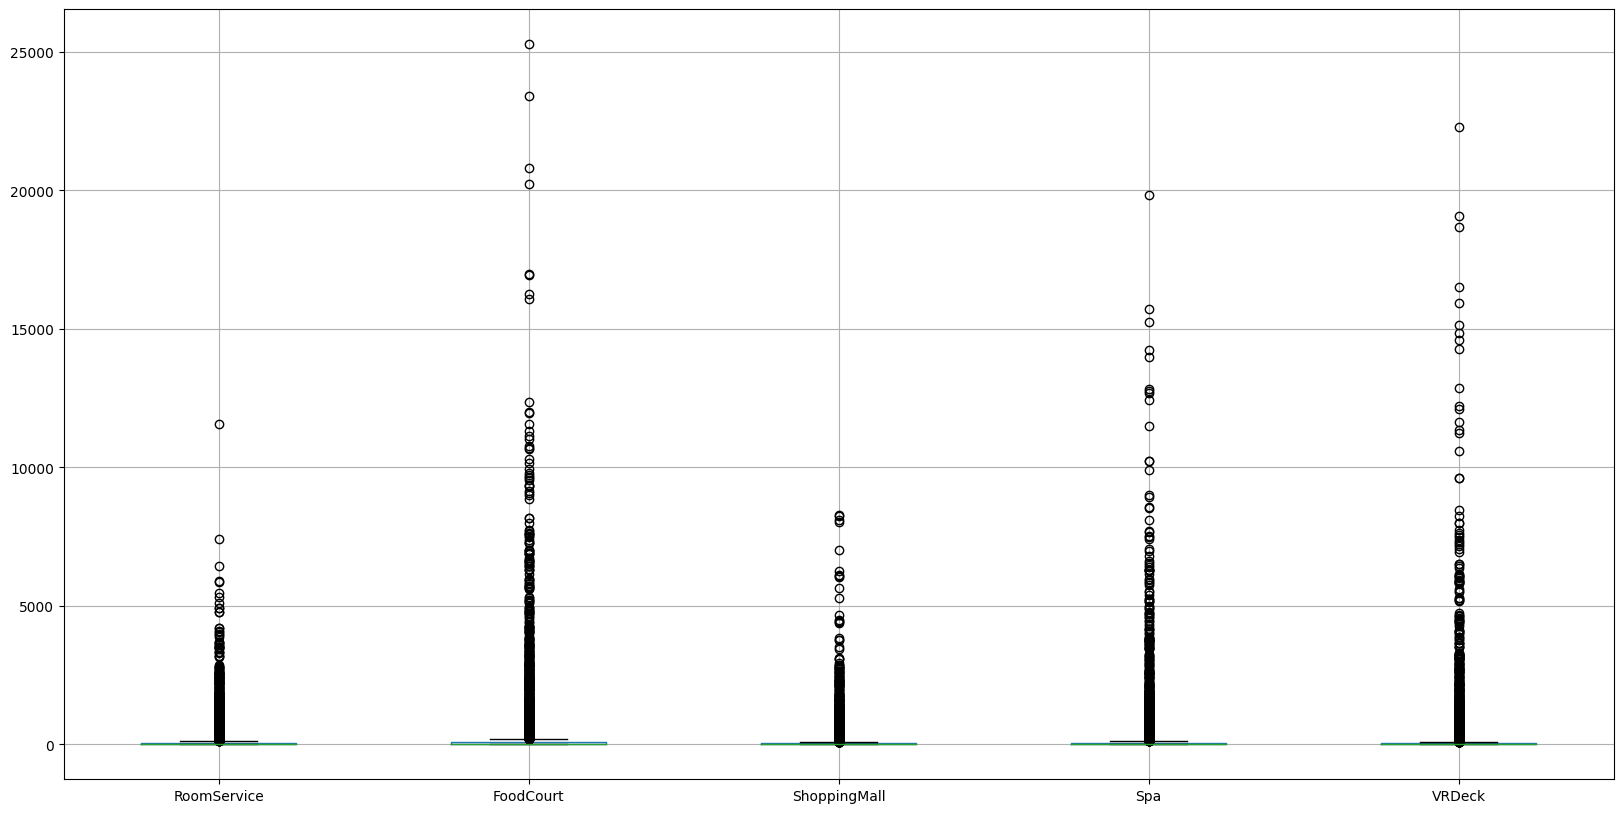

In [142]:
# Analysing The Quantity of outliers

# Median = 0
# Mode = 0

plt.figure(figsize = (20,10))
test.boxplot(column = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])
plt.show()

In [143]:
train['RoomService'].fillna(train['CryoSleep'],inplace = True)
test['RoomService'].fillna(test['CryoSleep'],inplace = True)

train['FoodCourt'].fillna(train['CryoSleep'],inplace = True)
test['FoodCourt'].fillna(test['CryoSleep'],inplace = True)

train['ShoppingMall'].fillna(train['CryoSleep'],inplace = True)
test['ShoppingMall'].fillna(test['CryoSleep'],inplace = True)

train['Spa'].fillna(train['CryoSleep'],inplace = True)
test['Spa'].fillna(test['CryoSleep'],inplace = True)

train['VRDeck'].fillna(train['CryoSleep'],inplace = True)
test['VRDeck'].fillna(test['CryoSleep'],inplace = True)

#### 2.3 - The Age

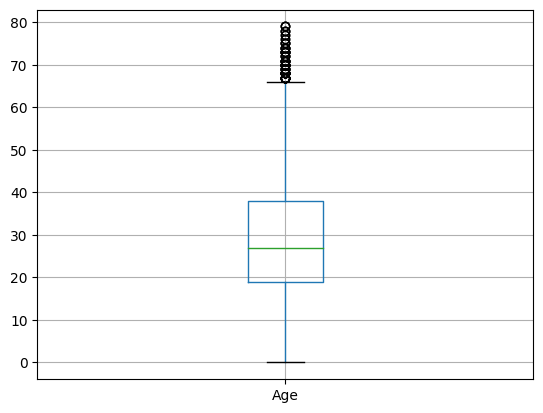

In [144]:
train.boxplot(column = ['Age'])
plt.show()

In [145]:
age_median_train = train['Age'].median()
age_median_test = test['Age'].median()

train['Age'].fillna(age_median_train,inplace = True)
test['Age'].fillna(age_median_test,inplace = True)

In [146]:
# true = 1
# false = 0

def transform_output(num):
    if num == True:
        return 1
    else:
        return 0
    
train['Transported'] = train['Transported'].map(transform_output)

In [147]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1


### 3 - Overview

#### 3.1 - Identifying problems of multicollinearity

In [148]:
# Pearson Correlation

train.corr()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.083371,-0.155681,0.134160,0.167086,0.212560,0.071530,0.101329,0.054861,0.039723,0.115327
CryoSleep,0.083371,1.000000,0.118972,-0.071323,-0.055944,-0.244074,-0.205921,-0.207774,-0.198298,-0.192713,0.460132
Destination,-0.155681,0.118972,1.000000,-0.014496,0.014144,-0.070953,0.026133,-0.036352,-0.000489,0.016113,0.067972
Age,0.134160,-0.071323,-0.014496,1.000000,0.093115,0.068626,0.127391,0.033147,0.120945,0.099589,-0.074233
VIP,0.167086,-0.055944,0.014144,0.093115,1.000000,0.070603,0.119614,0.006515,0.054203,0.113409,-0.015568
RoomService,0.212560,-0.244074,-0.070953,0.068626,0.070603,1.000000,-0.015131,0.052328,0.009239,-0.018629,-0.241118
FoodCourt,0.071530,-0.205921,0.026133,0.127391,0.119614,-0.015131,1.000000,-0.013723,0.221465,0.224569,0.045587
ShoppingMall,0.101329,-0.207774,-0.036352,0.033147,0.006515,0.052328,-0.013723,1.000000,0.014535,-0.007856,0.009403
Spa,0.054861,-0.198298,-0.000489,0.120945,0.054203,0.009239,0.221465,0.014535,1.000000,0.147655,-0.218541
VRDeck,0.039723,-0.192713,0.016113,0.099589,0.113409,-0.018629,0.224569,-0.007856,0.147655,1.000000,-0.204870


In [149]:
# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = train[['HomePlanet', 'CryoSleep', 'Destination',
 'Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
 
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
 for i in range(len(X.columns))]
 
print(vif_data)

        feature       VIF
0    HomePlanet  1.930272
1     CryoSleep  1.768450
2   Destination  1.358179
3           Age  2.470801
4           VIP  1.090715
5   RoomService  1.252869
6     FoodCourt  1.237218
7  ShoppingMall  1.132620
8           Spa  1.176196
9        VRDeck  1.175327


#### 3.2 - Principals statistics informations

In [150]:
train.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.00000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.650408,0.349362,0.390199,28.790291,0.032670,220.01714,448.442080,169.583343,304.596342,298.268952,0.503624
std,0.795075,0.476796,0.648944,14.341404,0.177782,660.51645,1595.788366,598.004041,1125.560539,1134.124545,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,37.000000,0.000000,41.00000,61.000000,22.000000,53.000000,40.000000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,14327.00000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


### 4 - Creating the Machine Learning Model

In [151]:
y = train['Transported']
x = train.drop('Transported',axis = 1)

In [154]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

#### 4.1 -  Creating a function to analyse the best model

In [155]:
def best_ML_norm(data):
    
    from sklearn.preprocessing import MinMaxScaler
    norm = MinMaxScaler(feature_range = (0,1))
    
    
    gb = GradientBoostingClassifier()
    rf = RandomForestClassifier()
    ab = AdaBoostClassifier()
    
    y = train['Transported']
    x = train.drop('Transported',axis = 1)
    x = norm.fit_transform(x)
    
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import StratifiedKFold
    
    skfold = StratifiedKFold(n_splits = 5)
    
    score_gb = cross_val_score(gb,x,y,cv = skfold,n_jobs = -1)
    score_rf = cross_val_score(rf,x,y,cv = skfold,n_jobs = -1)
    score_ab = cross_val_score(ab,x,y,cv = skfold,n_jobs = -1)
    
    print(f'Gradient Boosting Classifier:{round(score_gb.mean(),3)*100}')
    print(f'Random Forest Classifier {round(score_rf.mean(),3)*100}')
    print(f'Ada Boost Classifier {round(score_ab.mean(),3)*100}')

#### 4.2 - Analysing the best model

In [157]:
best_ML_norm(train)

Gradient Boosting Classifier:79.2
Random Forest Classifier 77.9
Ada Boost Classifier 78.5


#### 4.3 - Creating the model

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 10)

model = BaggingClassifier(n_estimators = 10,estimator = GradientBoostingClassifier(),n_jobs = -1)

model.fit(x_train,y_train)
print(model.score(x_test,y_test)*100)

79.29844738355378


### 5 - Submission

In [160]:
predict = model.predict(test)

In [161]:
def transform_predict(num):
    
    if num == 0:
        return False
    else:
        return True

In [162]:
predict = list(predict)

In [163]:
lista = []
for i in predict:
    lista.append(transform_predict(i))

In [164]:
sub = pd.Series(lista,index = index_test,name = 'Transported')
sub.shape

(4277,)

In [165]:
sub = pd.DataFrame(sub)

In [166]:
sub.to_csv('first_model.csv',header = True)